In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from utils import (
    calculate_stats,
    find_cointegrated_pairs,
    find_distance_pairs,
    find_pairs_from_list,
    find_pairs_from_two_lists,
    pairs_trade,
    pairs_trade_loop,
    pairs_trade_with_selection,
)


warnings.filterwarnings("ignore")

In [2]:
# load preprocessed data
data_df = pd.read_csv("data.csv", index_col=0)
data_df.head()

,ethanol,oats,wheat,sugarcane,canola,soybean,corn,gasolinerbob
Date,,,,,,,,
2000-01-04,1.285,109.00,247.25,5.77,251.3,464.25,203.00,0.6850
2000-01-05,1.286,109.25,249.75,5.81,252.6,469.25,203.00,0.6758
2000-01-06,1.280,109.00,248.50,5.77,254.7,468.00,203.75,0.6789
2000-01-07,1.280,109.50,251.75,5.84,256.5,471.50,207.00,0.6610
2000-01-10,1.281,109.50,253.50,5.83,253.8,473.50,208.50,0.6696


## Trading without Pair Selectioin

### Example 6 month of trading a single pair

return over the 6 month period is 0.051


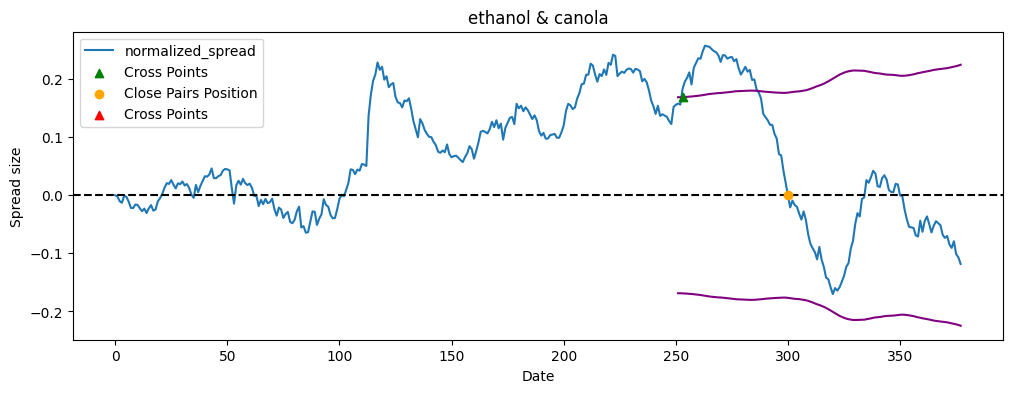

In [3]:
import warnings


warnings.filterwarnings("ignore")

############ INPUTS #########################
window_size = 252
i = 0
sigma = 2
asset_a = "ethanol"
asset_b = "canola"
transaction_cost = 0.005
############################################

temp_df, pair_return_list, final_cum_return = pairs_trade(
    data_df[i : i + window_size + 126],
    asset_a,
    asset_b,
    sigma=sigma,
    window_size=window_size,
    transaction_cost=transaction_cost,
    plot=True,
)
print(f"return over the 6 month period is {final_cum_return:.3f}")

In [4]:
calculate_stats(pair_return_list)

{'mean_return': 0.056421132862644496,
 'std_return': 0.0,
 'min_return': 0.056421132862644496,
 'max_return': 0.056421132862644496,
 'q1_return': 0.056421132862644496,
 'q3_return': 0.056421132862644496,
 'sharpe_ratio': nan,
 'skew_return': nan,
 'kurtosis_return': nan}

### Single pair 6 month trading (1 month step interval)

In [5]:
asset_a = "ethanol"
asset_b = "sugarcane"
step_size = 20
results = pairs_trade_loop(data_df, asset_a, asset_b, step_size)

(array([ 3.,  7.,  6., 12., 12., 37., 39., 40., 43., 33., 27., 22., 11.,
        11.,  5.,  3.,  2.,  2.,  0.,  1.]),
 array([-0.29966913, -0.26886121, -0.23805329, -0.20724537, -0.17643745,
        -0.14562952, -0.1148216 , -0.08401368, -0.05320576, -0.02239784,
         0.00841008,  0.039218  ,  0.07002592,  0.10083384,  0.13164176,
         0.16244968,  0.1932576 ,  0.22406552,  0.25487344,  0.28568136,
         0.31648928]),
 <BarContainer object of 20 artists>)

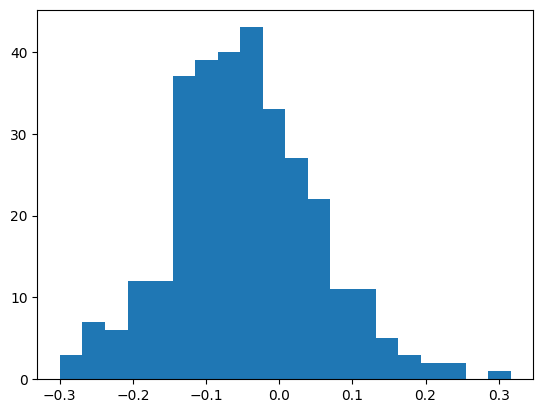

In [6]:
plt.hist(results, bins=20)

### Multiple iterations

In [7]:
def annualize_return(returns, days_trading=252):
    return (1 + returns) ** (252 / days_trading) - 1

In [8]:
commodity_pairs = find_pairs_from_list(data_df.columns[:].tolist())
print(len(commodity_pairs), commodity_pairs)

step_size = 20
transaction_cost = 0.005

28 [('ethanol', 'oats'), ('ethanol', 'wheat'), ('ethanol', 'sugarcane'), ('ethanol', 'canola'), ('ethanol', 'soybean'), ('ethanol', 'corn'), ('ethanol', 'gasolinerbob'), ('oats', 'wheat'), ('oats', 'sugarcane'), ('oats', 'canola'), ('oats', 'soybean'), ('oats', 'corn'), ('oats', 'gasolinerbob'), ('wheat', 'sugarcane'), ('wheat', 'canola'), ('wheat', 'soybean'), ('wheat', 'corn'), ('wheat', 'gasolinerbob'), ('sugarcane', 'canola'), ('sugarcane', 'soybean'), ('sugarcane', 'corn'), ('sugarcane', 'gasolinerbob'), ('canola', 'soybean'), ('canola', 'corn'), ('canola', 'gasolinerbob'), ('soybean', 'corn'), ('soybean', 'gasolinerbob'), ('corn', 'gasolinerbob')]


100%|██████████| 28/28 [03:28<00:00,  7.44s/it]

Mean Return: 0.02580083030805928
Standard Deviation: 0.08820086297671252
Minimum Return: -0.40310364954152755
Maximum Return: 0.5513246349819605
25th Percentile (Q1): -0.006622439843439659
75th Percentile (Q3): 0.07362896767590504
Sharpe Ratio: 0.29252355858322404
Skewness: 0.3156680046812773
Kurtosis: 2.3286961391523553


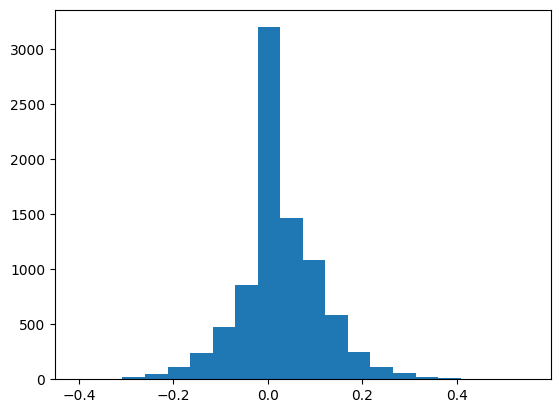

In [9]:
# all pairs
results = []
for i, j in tqdm(commodity_pairs):
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(
        data_df, i, j, window_size=252, sigma=2, transaction_cost=0.005, plot=False, figsize=(12, 4)
    )
    results.extend(temp)

plt.hist(results, bins=20)
summary_stats = calculate_stats(results, printing=True)

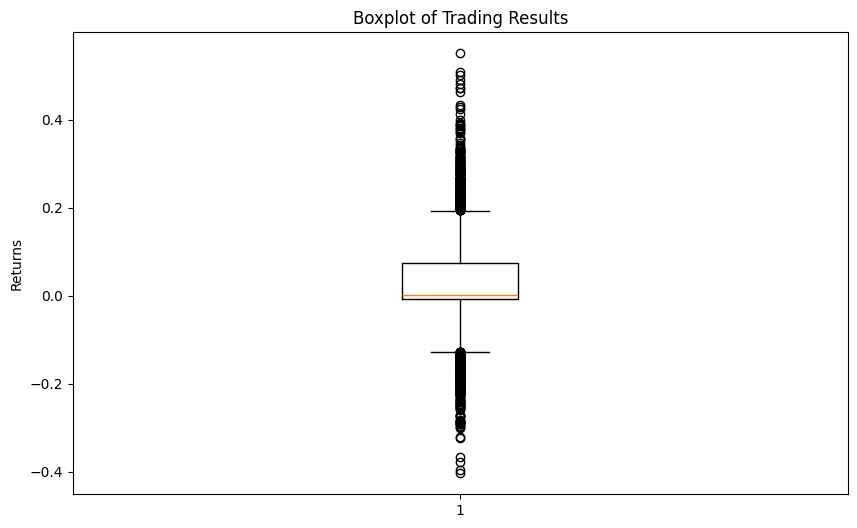

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(results)
plt.title("Boxplot of Trading Results")
plt.ylabel("Returns")
plt.show()

In [11]:
calculate_stats(results)

{'mean_return': 0.02580083030805928,
 'std_return': 0.08820086297671252,
 'min_return': -0.40310364954152755,
 'max_return': 0.5513246349819605,
 'q1_return': -0.006622439843439659,
 'q3_return': 0.07362896767590504,
 'sharpe_ratio': 0.29252355858322404,
 'skew_return': 0.3156680046812773,
 'kurtosis_return': 2.3286961391523553}

In [12]:
# Biodiesel feedstocks
biodiesel_feedstocks = ["canola", "oats", "soybean"]
biodiesel_feedstocks_pairs = find_pairs_from_list(biodiesel_feedstocks)
biodiesel_returns = []

for i, j in tqdm(biodiesel_feedstocks_pairs):
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    biodiesel_returns.extend(temp)

results_biodiesel_feedstocks = calculate_stats(biodiesel_returns, printing=True)

100%|██████████| 3/3 [00:23<00:00,  7.77s/it]

Mean Return: 0.01670924466558915
Standard Deviation: 0.07107688560418732
Minimum Return: -0.28530314460833495
Maximum Return: 0.24867523072308728
25th Percentile (Q1): -0.009636316131163225
75th Percentile (Q3): 0.054780898546804235
Sharpe Ratio: 0.23508689953917689
Skewness: -0.0008643669167094347
Kurtosis: 1.5429629422788507


In [13]:
calculate_stats(annualize_return(np.array(biodiesel_returns)))

{'mean_return': 0.01670924466558915,
 'std_return': 0.07107688560418732,
 'min_return': -0.28530314460833495,
 'max_return': 0.24867523072308728,
 'q1_return': -0.009636316131163225,
 'q3_return': 0.054780898546804235,
 'sharpe_ratio': 0.23508689953917689,
 'skew_return': -0.0008643669167094347,
 'kurtosis_return': 1.5429629422788507}

In [14]:
ethanol_feedstocks = ["corn", "wheat", "sugarcane"]
ethanol_feedstocks_pairs = find_pairs_from_list(ethanol_feedstocks)
ethanol_returns = []

for i, j in tqdm(ethanol_feedstocks_pairs):
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    ethanol_returns.extend(temp)

results_ethanol_feedstocks = calculate_stats(ethanol_returns, printing=True)

100%|██████████| 3/3 [00:22<00:00,  7.61s/it]

Mean Return: 0.007657698996694461
Standard Deviation: 0.08819640933600158
Minimum Return: -0.3206046455870848
Maximum Return: 0.26515184681798964
25th Percentile (Q1): -0.02559681345976217
75th Percentile (Q3): 0.06025208096057677
Sharpe Ratio: 0.08682551879772055
Skewness: -0.3259840847689639
Kurtosis: 0.7961389042831937


In [15]:
calculate_stats(annualize_return(np.array(ethanol_returns)))

{'mean_return': 0.007657698996694461,
 'std_return': 0.08819640933600158,
 'min_return': -0.3206046455870848,
 'max_return': 0.26515184681798964,
 'q1_return': -0.02559681345976217,
 'q3_return': 0.06025208096057677,
 'sharpe_ratio': 0.08682551879772055,
 'skew_return': -0.3259840847689639,
 'kurtosis_return': 0.7961389042831937}

In [16]:
### ethanol은 오히려 gasoline이랑 pairing 가능한 거 아닌가?
fuel_feedstocks = ["ethanol", "gasolinerbob"]
fuel_feedstocks_pairs = find_pairs_from_list(fuel_feedstocks)
fuel_returns = []

for i, j in tqdm(fuel_feedstocks_pairs):
    # _, temp = pairs_trade(data_df, i, j, window_size=252, sigma=2, transaction_cost=0.01, plot=True, figsize=(12, 4))
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    fuel_returns.extend(temp)

results_fuel_feedstocks = calculate_stats(fuel_returns, printing=True)

100%|██████████| 1/1 [00:07<00:00,  7.91s/it]

Mean Return: 0.061984864212569324
Standard Deviation: 0.09765939049193809
Minimum Return: -0.14232493898250875
Maximum Return: 0.4734988990072966
25th Percentile (Q1): 0.0
75th Percentile (Q3): 0.12319949442480449
Sharpe Ratio: 0.6347045983016478
Skewness: 0.8973907159818251
Kurtosis: 0.793406772889397


In [17]:
calculate_stats(annualize_return(np.array(fuel_returns)))

{'mean_return': 0.061984864212569324,
 'std_return': 0.09765939049193809,
 'min_return': -0.14232493898250875,
 'max_return': 0.4734988990072966,
 'q1_return': 0.0,
 'q3_return': 0.12319949442480449,
 'sharpe_ratio': 0.6347045983016478,
 'skew_return': 0.8973907159818251,
 'kurtosis_return': 0.793406772889397}

In [19]:
biodiesel_ethanol_feedstocks_pairs = find_pairs_from_two_lists(biodiesel_feedstocks, ethanol_feedstocks)
results = []

for i, j in tqdm(biodiesel_ethanol_feedstocks_pairs):
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_biodiesel_ethanol_feedstocks = calculate_stats(annualize_return(np.array(results)))
results_biodiesel_ethanol_feedstocks

100%|██████████| 9/9 [01:09<00:00,  7.68s/it]


{'mean_return': 0.015314961214304628,
 'std_return': 0.07817821569346727,
 'min_return': -0.2901243554231159,
 'max_return': 0.49155276940102866,
 'q1_return': -0.015172348345859343,
 'q3_return': 0.05915605603448282,
 'sharpe_ratio': 0.19589806544515928,
 'skew_return': 0.05606835581289642,
 'kurtosis_return': 2.5450292941496846}

In [20]:
biodiesel_fuel_pairs = find_pairs_from_two_lists(biodiesel_feedstocks, fuel_feedstocks)
results = []

for i, j in tqdm(biodiesel_fuel_pairs):
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_biodiesel_fuel_feedstocks = calculate_stats(annualize_return(np.array(results)), printing=True)
results_biodiesel_fuel_feedstocks

100%|██████████| 6/6 [00:46<00:00,  7.83s/it]

Mean Return: 0.03673563604822241
Standard Deviation: 0.09501380890227387
Minimum Return: -0.40310364954152755
Maximum Return: 0.50915599135928
25th Percentile (Q1): 0.0
75th Percentile (Q3): 0.09183800471478043
Sharpe Ratio: 0.38663470576163006
Skewness: 0.1718937102155029
Kurtosis: 2.351623492228743


{'mean_return': 0.03673563604822241,
 'std_return': 0.09501380890227387,
 'min_return': -0.40310364954152755,
 'max_return': 0.50915599135928,
 'q1_return': 0.0,
 'q3_return': 0.09183800471478043,
 'sharpe_ratio': 0.38663470576163006,
 'skew_return': 0.1718937102155029,
 'kurtosis_return': 2.351623492228743}

In [21]:
ethanol_fuel_pairs = find_pairs_from_two_lists(ethanol_feedstocks, fuel_feedstocks)
results = []

for i, j in tqdm(ethanol_fuel_pairs):
    temp = pairs_trade_loop(data_df, i, j, transaction_cost=transaction_cost)
    results.extend(temp)

results_ethanol_fuel_feedstocks = calculate_stats(annualize_return(np.array(results)))
results_ethanol_fuel_feedstocks

100%|██████████| 6/6 [00:46<00:00,  7.73s/it]


{'mean_return': 0.03818151436802727,
 'std_return': 0.09613387138774789,
 'min_return': -0.29493641073405763,
 'max_return': 0.5513246349819605,
 'q1_return': 0.0,
 'q3_return': 0.09647445308986269,
 'sharpe_ratio': 0.3971702566104442,
 'skew_return': 0.6155044230142666,
 'kurtosis_return': 1.9736342157897866}

## Pair Selection Stage

- Input: A dataframe of closing prices
  - Assert that the length of the dataframe is at least 18 months
- Optional inputs: optimal_threshold, trading_cost, specific pairs,


- Form pairs by using 12 months of daily price data and then trade them in the subsequent 6-month interval.
- Form pairs by finding a "partner" that minimizes the sum of squared differences (SSD) in the normalized prices of the two stocks
- $1 long and short positions.
- Repeat the 12+6 implementation cycle every month.
- all trades have a one-day delay to alleviate concerns reparding potential upward bias in the reported returns induced by bid-ask bounce.

### Co-integration

In [22]:
data_df = pd.read_csv("data.csv", index_col=0)
data_df.head()

,ethanol,oats,wheat,sugarcane,canola,soybean,corn,gasolinerbob
Date,,,,,,,,
2000-01-04,1.285,109.00,247.25,5.77,251.3,464.25,203.00,0.6850
2000-01-05,1.286,109.25,249.75,5.81,252.6,469.25,203.00,0.6758
2000-01-06,1.280,109.00,248.50,5.77,254.7,468.00,203.75,0.6789
2000-01-07,1.280,109.50,251.75,5.84,256.5,471.50,207.00,0.6610
2000-01-10,1.281,109.50,253.50,5.83,253.8,473.50,208.50,0.6696


In [23]:
p_value_matrix, cointegrated_pairs = find_cointegrated_pairs(data_df)
print(cointegrated_pairs)

[('ethanol', 'gasolinerbob', np.float64(2.4940985314177127e-05)), ('wheat', 'gasolinerbob', np.float64(4.58971535337662e-05)), ('ethanol', 'corn', np.float64(0.00032014497608145824)), ('wheat', 'soybean', np.float64(0.0006240694924619997)), ('ethanol', 'wheat', np.float64(0.0008161927883168374)), ('wheat', 'corn', np.float64(0.0008766757632328298)), ('ethanol', 'soybean', np.float64(0.0012607277609652163)), ('soybean', 'gasolinerbob', np.float64(0.0016831914668522796)), ('ethanol', 'sugarcane', np.float64(0.002467315285970824)), ('ethanol', 'oats', np.float64(0.002610780477913768)), ('corn', 'gasolinerbob', np.float64(0.0027241437615791427)), ('sugarcane', 'gasolinerbob', np.float64(0.0057463693246532915)), ('sugarcane', 'corn', np.float64(0.005773268829705492)), ('sugarcane', 'soybean', np.float64(0.007127213574761975)), ('ethanol', 'canola', np.float64(0.009708552161880908)), ('oats', 'soybean', np.float64(0.010636348203788476)), ('oats', 'wheat', np.float64(0.011458840076874373)), (

In [24]:
print(find_distance_pairs(data_df))

[('soybean', 'corn', np.float64(24.176203310436588)), ('wheat', 'soybean', np.float64(28.417955610679048)), ('wheat', 'corn', np.float64(31.105922259068922)), ('canola', 'soybean', np.float64(35.41056158427629)), ('canola', 'corn', np.float64(37.23708389909695)), ('wheat', 'canola', np.float64(41.515406078517394)), ('oats', 'wheat', np.float64(57.412739002745994)), ('oats', 'soybean', np.float64(62.27432452448086)), ('oats', 'gasolinerbob', np.float64(64.1314300844568)), ('oats', 'canola', np.float64(64.80784122022366)), ('oats', 'corn', np.float64(67.52308191754265)), ('sugarcane', 'gasolinerbob', np.float64(68.85903983814832)), ('ethanol', 'canola', np.float64(69.5764042370054)), ('sugarcane', 'soybean', np.float64(69.5965780258989)), ('wheat', 'gasolinerbob', np.float64(69.83449472579238)), ('ethanol', 'corn', np.float64(70.21847419357726)), ('soybean', 'gasolinerbob', np.float64(71.16394468848169)), ('ethanol', 'soybean', np.float64(75.42468295346266)), ('sugarcane', 'corn', np.flo

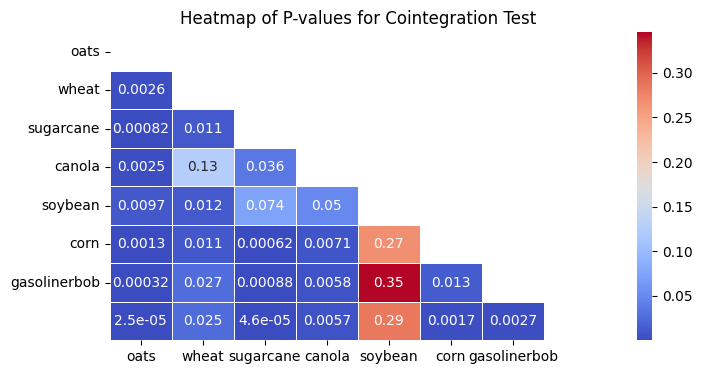

In [25]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(p_value_matrix, dtype=bool))

# Create a heatmap of the p-value matrix with the mask
plt.figure(figsize=(8, 4))
sns.heatmap(
    p_value_matrix.T,
    mask=mask,
    xticklabels=data_df.columns[1:],
    yticklabels=data_df.columns[1:],
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Heatmap of P-values for Cointegration Test")
plt.show()

In [26]:
results_coint = pairs_trade_with_selection(data_df, "cointegration", window_size=252, sigma=2, transaction_cost=0.005)
calculate_stats(results_coint)

100%|██████████| 305/305 [00:41<00:00,  7.42it/s]


{'mean_return': 0.01694160332346246,
 'std_return': 0.08684041822096081,
 'min_return': -0.27315819224620685,
 'max_return': 0.3125149484289771,
 'q1_return': -0.02347336696178734,
 'q3_return': 0.06632686543926486,
 'sharpe_ratio': 0.19508891908322523,
 'skew_return': -0.01826782870523002,
 'kurtosis_return': 1.1687216349314573}

In [27]:
results_all = pairs_trade_with_selection(data_df, "all", window_size=252, sigma=2, transaction_cost=0.005)
calculate_stats(results_all)

100%|██████████| 305/305 [03:34<00:00,  1.42it/s]


{'mean_return': 0.02580083030805928,
 'std_return': 0.08820086297671254,
 'min_return': -0.40310364954152755,
 'max_return': 0.5513246349819605,
 'q1_return': -0.006622439843439659,
 'q3_return': 0.07362896767590504,
 'sharpe_ratio': 0.292523558583224,
 'skew_return': 0.31566800468127726,
 'kurtosis_return': 2.3286961391523517}

(array([2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.300e+01, 7.000e+00,
        1.700e+01, 3.000e+01, 4.400e+01, 6.600e+01, 9.700e+01, 1.440e+02,
        1.920e+02, 2.800e+02, 3.830e+02, 4.750e+02, 2.546e+03, 6.500e+02,
        7.350e+02, 7.300e+02, 5.900e+02, 4.910e+02, 3.460e+02, 2.380e+02,
        1.410e+02, 1.080e+02, 6.500e+01, 4.200e+01, 3.400e+01, 2.500e+01,
        1.700e+01, 6.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.40310365, -0.37924294, -0.35538224, -0.33152153, -0.30766082,
        -0.28380011, -0.25993941, -0.2360787 , -0.21221799, -0.18835729,
        -0.16449658, -0.14063587, -0.11677516, -0.09291446, -0.06905375,
        -0.04519304, -0.02133234,  0.00252837,  0.02638908,  0.05024979,
         0.07411049,  0.0979712 ,  0.12183191,  0.14569261,  0.16955332,
         0.19341403,  0.21727474,  0.24113544,  0.26499615,  0.28885686,
         0.31271756,  0.33657827,  0.36043898,  0.38429969,  0.4

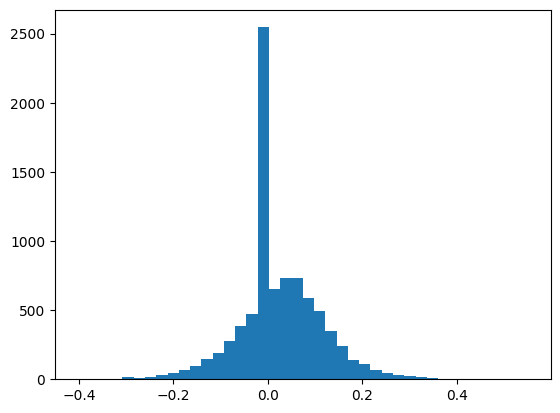

In [28]:
plt.hist(results_all, bins=40)

## Robustness Tests

### Transaction fee

In [29]:
all_pairs = find_pairs_from_list(data_df.columns.tolist())
fee_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
fee_results = []
for fee in tqdm(fee_list):
    results = []
    for i, j in all_pairs:
        _, _, temp = pairs_trade(
            data_df, i, j, window_size=252, sigma=2, transaction_cost=fee, plot=False, figsize=(12, 4)
        )
        results.append(temp)
    fee_results.append(results)

100%|██████████| 10/10 [00:55<00:00,  5.51s/it]


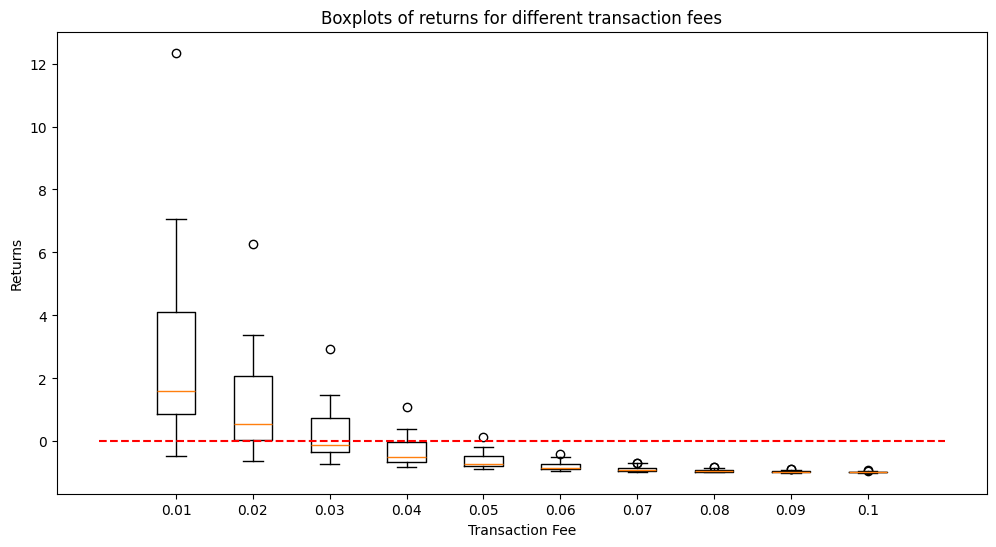

In [30]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each list in fee_results
ax.boxplot(fee_results)

# Set the x-axis labels to the corresponding fee values
ax.set_xticklabels(fee_list)

# Set the title and labels
ax.set_title("Boxplots of returns for different transaction fees")
ax.set_xlabel("Transaction Fee")
ax.set_ylabel("Returns")
ax.hlines(0, 0, len(fee_list) + 1, linestyles="dashed", colors="r")

# Show the plot
plt.show()

### Sigma

In [ ]:
all_pairs = find_pairs_from_list(data_df.columns[:].tolist())
sigma_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
sigma_results = []
for sigma in tqdm(sigma_list):
    results = []
    for i, j in all_pairs:
        _, _, temp = pairs_trade(
            data_df, i, j, window_size=252, sigma=sigma, transaction_cost=0.01, plot=False, figsize=(12, 4)
        )
        results.append(temp)
    sigma_results.append(results)

100%|██████████| 8/8 [00:45<00:00,  5.69s/it]


In [32]:
[str(x) for x in sigma_list]

['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4']

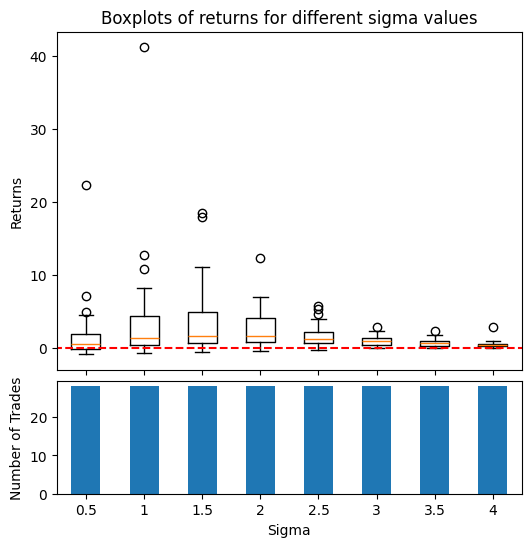

In [39]:
# Create a figure and axis
fig, ax = plt.subplots(2, figsize=(6, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]})

# Create boxplots for each list in sigma_results
ax[0].boxplot(sigma_results, positions=range(len(sigma_list)))

# Set the title and labels
ax[0].set_title("Boxplots of returns for different sigma values")
ax[0].set_ylabel("Returns")
ax[0].hlines(0, -5, len(sigma_list) + 1, linestyles="dashed", colors="r")

# Calculate the number of trades for each sigma
num_trades = [len(x) for x in sigma_results]

# Create a bar chart
bars = ax[1].bar([str(x) for x in sigma_list], num_trades, width=0.5)

# Set the title and labels
ax[1].set_xlabel("Sigma")
ax[1].set_ylabel("Number of Trades")
ax[1].set_xlabel("Sigma")
ax[1].set_ylabel("Number of Trades")
ax[1].set_xticklabels([str(x) for x in sigma_list])

height = bars[0].get_height()
# ax[1].text(
#     bars[0].get_x() + bars[0].get_width() / 2,
#     height - 450,
#     str(height),
#     ha="center",
#     va="bottom",
#     fontsize=10,
#     color="white",
# )
# for bar in bars[1:]:
#     height = bar.get_height()
#     ax[1].text(bar.get_x() + bar.get_width() / 2, height + 50, str(height), ha="center", va="bottom", fontsize=10)


plt.subplots_adjust(hspace=0.05)  # Adjust the vertical space

# Show the plot
plt.show()